### Homework 3

**1.** For a constant $c$, show that $E[(s-c)^2] = (c-E[s])^2 + Var[s]$. (2 points)

Solution:
We know that $Var[X] = E[X^2] - (E[X])^2$. <br>
We can use this by considering $E[X^2] = Var[X] + (E[X])^2$.

First, we can expand the left-hand side:
$$
E[(s-c)^2] = E[s^2 - 2sc + c^2] = E[s^2] - 2cE[s] + c^2
$$
(we can drop the Expectation for c since it is a constant). <br><br>
Now, we can substitute $E[s^2]$ with $Var[s] + (E[s])^2$:
$$
E[(s-c)^2] = Var[s] + (E[s])^2 - 2cE[s] + c^2
$$
Now we can rearrange the equation and contract the terms:
$$
E[(s-c)^2] = (E[s]-c)^2 + Var[s]
$$
Because $x^2=(-x)^2$, we can switch the order of the terms in the square:
$$
E[(s-c)^2] = (c-E[s])^2 + Var[s]
$$
<br><br>

**2.** Let $X \sim Poisson(\lambda)$.

**(a)**
Plot in Python the probability mass function (p.m.f.) of X for λ = 1; 5; 10; 50. What do you observe
about the shape of the p.m.f. as λ grows?
*(1 point)*

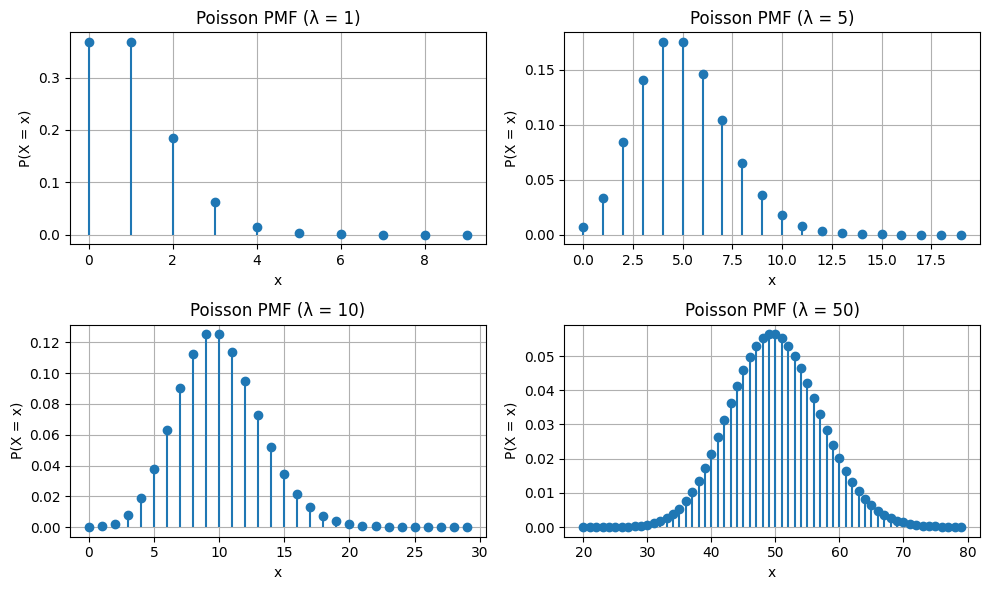

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, nbinom
# Set the random seed for reproducibility
np.random.seed(42)

lambdas = [1, 5, 10, 50]
x_values = {
    1: np.arange(0, 10),
    5: np.arange(0, 20),
    10: np.arange(0, 30),
    50: np.arange(20, 80)
}

plt.figure(figsize=(10, 6))
for i, lam in enumerate(lambdas):
    plt.subplot(2, 2, i + 1)
    x = x_values[lam]
    y = poisson.pmf(x, mu=lam)
    plt.stem(x, y, basefmt=" ")
    plt.title(f'Poisson PMF (λ = {lam})')
    plt.xlabel('x')
    plt.ylabel('P(X = x)')
    plt.grid(True)
plt.tight_layout()
plt.show()

As $\lambda$ grows, the shape of pmf starts to resemble a normal distribution which is very apparent for $\lambda = 50$.

**(b)**
What are the parameters of the best matching Normal distribution for
a given Poisson distribution with parameter λ? No formal derivation is required here, use your intuition and verify by plotting (for the same values of
λ as above).
(1 point)

Since for a Poisson distribution, we have that $E[X] = Var[X] = \lambda$, we can best approximate it with a Normal distribution $\mathcal{N}(x; \mu = \lambda, \sigma = \sqrt{\lambda})$.

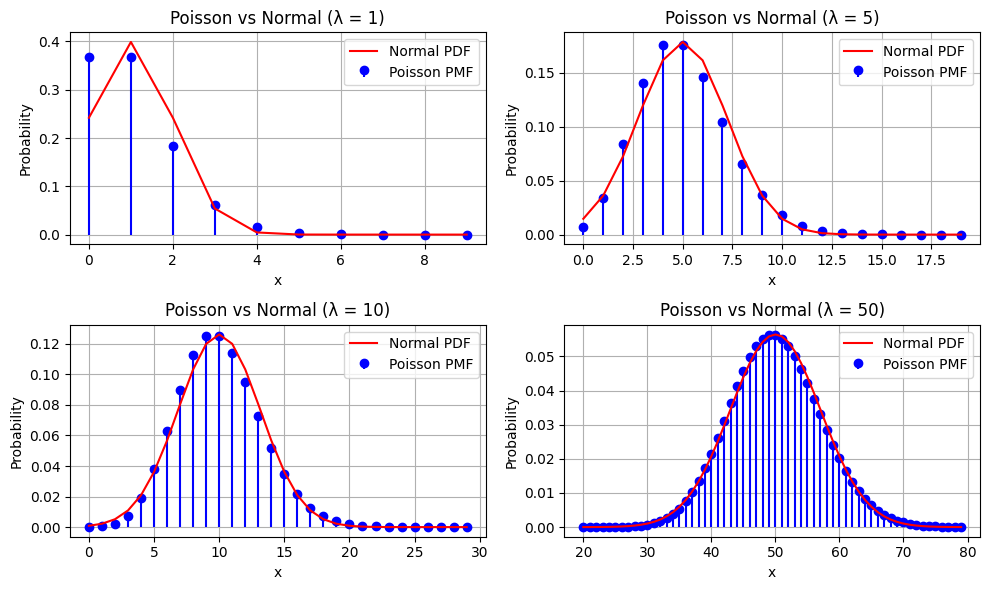

In [2]:
plt.figure(figsize=(10, 6))
for i, lam in enumerate(lambdas):
    plt.subplot(2, 2, i + 1)
    x = x_values[lam]
    poisson_y = poisson.pmf(x, mu=lam)
    normal_y = norm.pdf(x, loc=lam, scale=np.sqrt(lam))
    
    plt.stem(x, poisson_y, basefmt=" ", linefmt='b-', markerfmt='bo', label='Poisson PMF')
    plt.plot(x, normal_y, 'r-', label='Normal PDF')
    plt.title(f'Poisson vs Normal (λ = {lam})')
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

**3. Noise models**

Assume a tuning curve $f(s)$ with stimulus angle $s \in [-\pi, \pi]$:
$$f(s) = \begin{cases}
    - f_{max} \tfrac4{\pi^2} (s-\tfrac\pi2) (s + \tfrac\pi2) &\quad s \in [-\tfrac\pi2, \tfrac\pi2]\\
    0 &\quad else
\end{cases} $$
In each subtask the firing rate $r$ is given by a different noise model. For a discreticed interval (50 bins) for $s$ into, draw 10 samples from $p(r|f(s))$. Do this for different $f_{max} = 1; 10; 100$, and plot the rates, their mean $\pm$ sem (standard error of the mean), and the analytical function.
(1.5 points for each subtask)

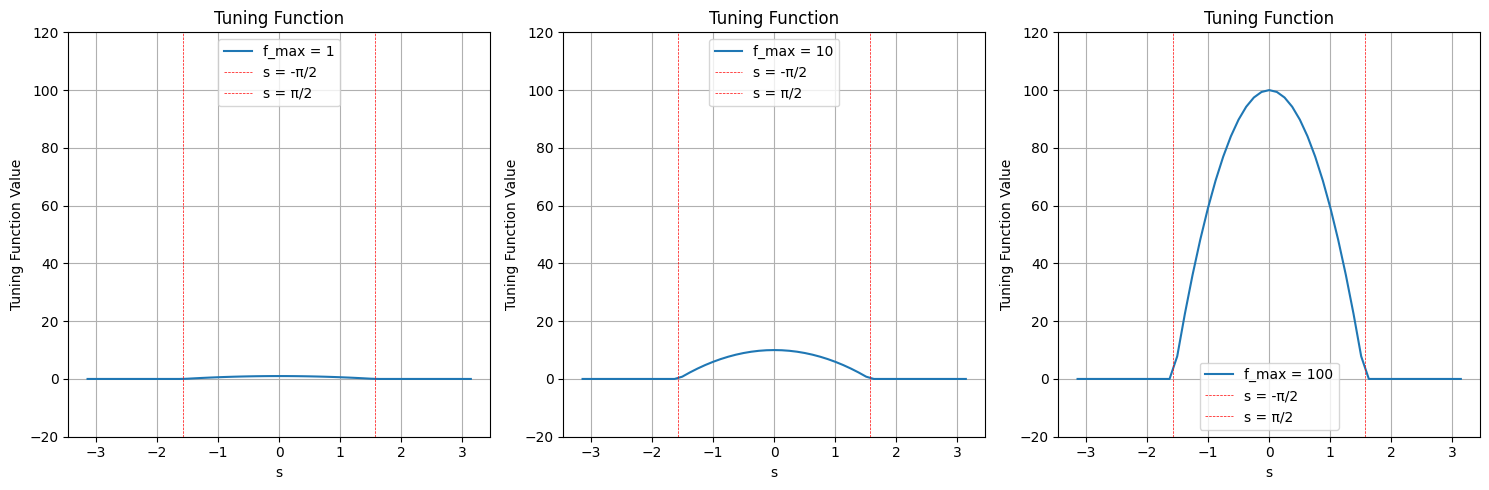

In [3]:
f_max_list = [1, 10, 100]
s_interval = np.linspace(-np.pi, np.pi, 51, endpoint=True)
n_samples = 10

def tuning_function(s, f_max):
    result = np.zeros_like(s)
    mask = (s >= -np.pi/2) & (s <= np.pi/2)
    result[mask] = -f_max * (4 / (np.pi**2)) * (s[mask] - np.pi/2) * (s[mask] + np.pi/2)
    return result

# plot tuning functions
plt.figure(figsize=(15, 5))
for i, f_max in enumerate(f_max_list):
    plt.subplot(1, 3, i + 1)
    y = tuning_function(s_interval, f_max)
    plt.plot(s_interval, y, label=f'f_max = {f_max}')
    plt.ylim(-0.2 * max(f_max_list), 1.2 * max(f_max_list))

    plt.axvline(-np.pi/2, color='red', lw=0.5, ls='--', label='s = -π/2')
    plt.axvline(np.pi/2, color='red', lw=0.5, ls='--', label='s = π/2')
        
    plt.title('Tuning Function')
    plt.xlabel('s')
    plt.ylabel('Tuning Function Value')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Main plotting function
def plot_noise_model(noise_func, model_name):
    fig, axes = plt.subplots(3, 1, figsize=(9, 7), sharex=True)

    for idx, f_max in enumerate(f_max_list):
        ax = axes[idx]
        f_s = tuning_function(s_interval, f_max)
        samples = noise_func(f_s) # (n_samples, len(s_interval))
        
        # make scatter each point very small
        for i in range(n_samples):
            ax.scatter(s_interval, samples[i], color="b", alpha=0.5, s=1, label="Samples" if i == 0 else "")
        
        # plot mean and SEM
        mean = samples.mean(axis=0)
        sem = samples.std(axis=0) / np.sqrt(n_samples)
        ax.plot(s_interval, mean, color='orange', linewidth=2)
        ax.errorbar(s_interval, mean, yerr=sem, fmt='o', color='orange', label='Mean ± SEM', markersize=2)
       
        # plot tunning curve
        ax.plot(s_interval, f_s, color='b', label='Analatical', linestyle='--')
            
        ax.set_ylabel(f"$f_{{max}} = {f_max}$\nFiring Rate")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        

    axes[-1].set_xlabel("Stimulus (s)")
    handles, labels = axes[-1].get_legend_handles_labels()
    # fig.legend(handles, labels, loc='lower center', ncol=3, frameon=True)
    fig.suptitle(f'{model_name} Noise Model')
    plt.tight_layout()
    plt.legend()
    plt.show()

**(a)** Additive normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=1$.

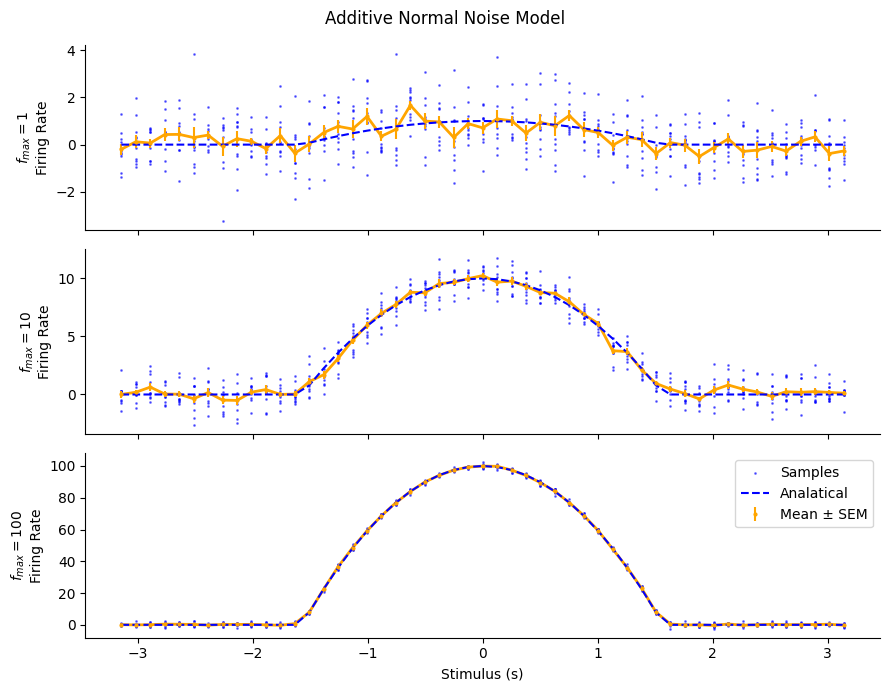

In [5]:
def additive_normal_noise(f_s):
    return np.random.normal(loc=f_s, scale=1.0, size=(n_samples, len(f_s)))

plot_noise_model(additive_normal_noise, "Additive Normal")

**(b)** Multiplicative normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=f(s)$.

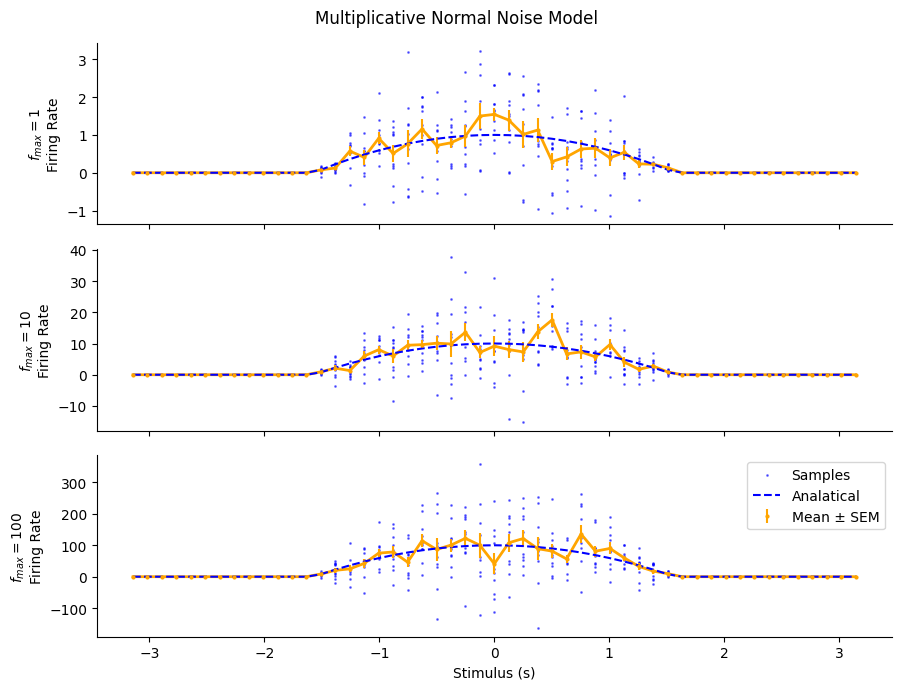

In [6]:
def multiplicative_normal(f_s):
    return np.random.normal(loc=f_s, scale=np.clip(f_s, 0, None), size=(n_samples, len(f_s)))

plot_noise_model(multiplicative_normal, "Multiplicative Normal")

**(c)** Poisson noise
$$p(r|f(s))=\frac{f(s)^r}{r!} e^{-f(s)}$$

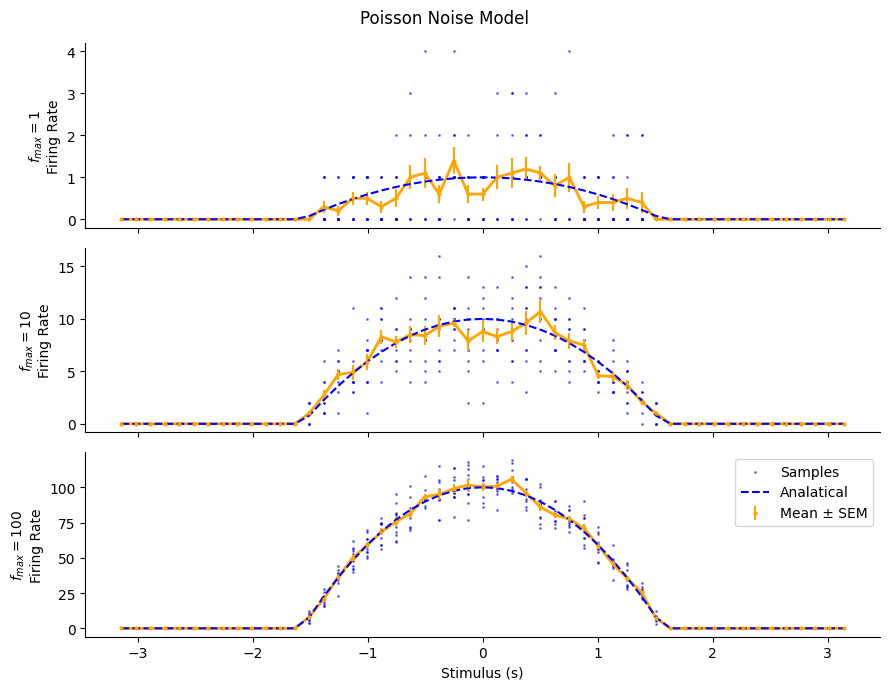

In [7]:
def poisson_noise(f_s):
    return np.random.poisson(lam=f_s, size=(n_samples, len(f_s)))

plot_noise_model(poisson_noise, "Poisson")

**(d)** Negative Binomial
$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with $p=\frac{f(s)}{f(s)+q}$, $q=f(s)$.
Be careful about the case when $p = 0$.

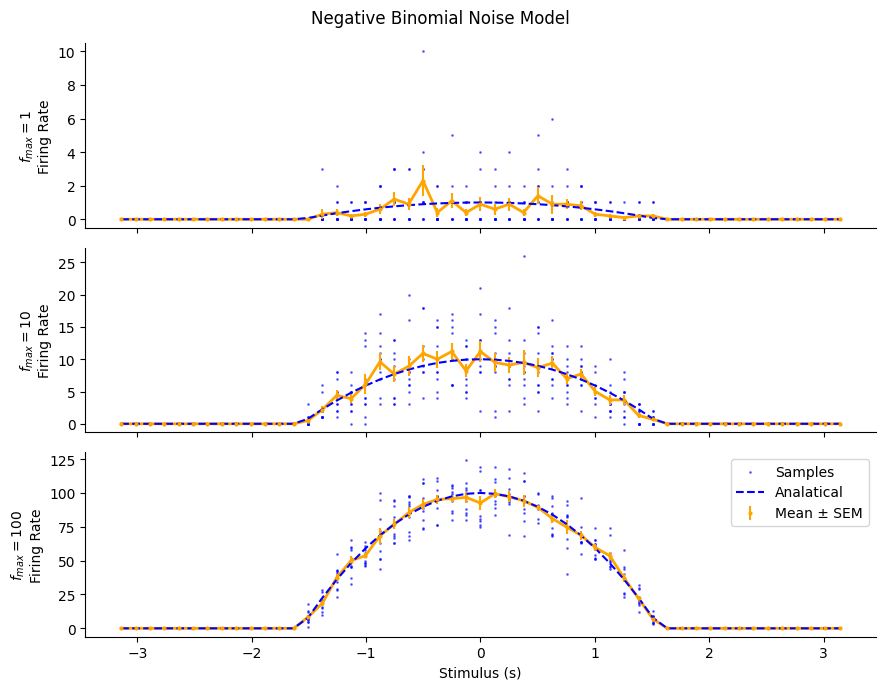

In [14]:
def negative_binomial(f_s):
    eps = 1e-6
    q = np.clip(f_s, eps, None)
    p = q / (q + q)  # since q = f(s), this simplifies to 0.5 for f_s > 0
    samples = np.zeros((n_samples, len(f_s)))
    for i in range(len(f_s)):
        if f_s[i] > 0:
            samples[:, i] = nbinom.rvs(q[i], 0.5, size=n_samples) # p = 0.5
    return samples

plot_noise_model(negative_binomial, "Negative Binomial")

**(e)** Based on your results, briefly discuss how realistic each of these models is. (1 point)


- **Additive Normal**: Adds constant noise regardless of firing rate. As seen in the plots, this causes substantial negative firing rates at low $f_{max}$, which are not biologically plausible since spike counts can't be negative. This model also violates the empirical observation that variability increases with firing rate. Not realistic for modeling neural spiking.

- **Multiplicative Normal**: Noise scales with firing rate, so variability increases near the peak of the tuning curve.  This reflects the experimentally observed relationship between mean and variance in some cortical areas. However, it still permits negative rates, which is a fundamental issue for spiking models. Better than additive, but still limited.

- **Poisson**: Variance equals the mean ($\mathrm{Var}(r) = \mathbb{E}[r]$) i.e. Fano-factor = 1. The plots show variability increasing with $f(s)$ and zero variance when $f(s) = 0$, which is consistent with observed spike count distributions in many sensory neurons. It is more realistic than the previous two models since response noise is being modeled as a Poisson process and it only allows non-negative firing rates, but it only allows discrete values.

- **Negative Binomial**: Captures overdispersion (variance > mean) i.e. Fano-factor > 1, which is often observed in real neural data _(Goris, Movshon, Simonchelli, 2014)_. The plots show relatvely higher variability at high $f_{max}$ than Poisson, while still producing non-negative discrete counts. Most realistic among the four.